In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
%matplotlib inline

# データの取り込み

In [2]:
url = "http://www.data.jma.go.jp/obd/stats/etrn/view/monthly_a1.php?prec_no=62&block_no=1062&year=2016&month=&day=&view=a2"
df = pd.io.html.read_html(url) # urlで指定しtページのテーブルデータを読み込む
dataAll = df[0] # 最初の表が気温データ
data = dataAll[3:].loc[3:15,1:3].astype(float)
data.reset_index(drop=True,inplace=True)
data.columns=['平均','最高','最低']
data.index=['1','2','3','4','5','6','7','8','9','10','11','12']

In [3]:
data

,平均,最高,最低
1,6.6,10.5,2.3
2,7.1,11.6,2.6
3,10.4,15.7,5.3
4,16.1,21.0,11.5
5,20.5,25.9,15.4
6,23.0,27.5,19.1
7,27.8,32.4,24.2
8,29.3,34.9,25.3
9,25.4,29.8,22.0
10,20.2,24.9,16.0


# Placefolder

In [28]:
m = tf.placeholder(tf.float32,[None,1]) # 月の数値格納用　便宜的に０乗から４乗まで独立データ扱い
t = tf.placeholder(tf.float32,[None,1]) # 気温の実データ格納用 

# Variables

In [6]:
w = tf.Variable(tf.zeros([5,1])) # 求めるべき回帰曲線の係数

# 出力の計算

In [31]:
y = w[0][0]
for i  in range(1,5):
    y = y + tf.multiply(w[i][0],m**i)

# 目的関数の定義

In [32]:
loss = tf.reduce_sum(tf.square(y-t))

# 学習ステップの定義

In [33]:
train_step = tf.train.AdamOptimizer().minimize(loss)

# 学習セッションの初期化

In [34]:
sess = tf.Session()
#sess.run(tf.initialize_all_variables())   # 古い書き方
sess.run(tf.global_variables_initializer()) # 変数の初期化

In [35]:
sess.run(w)

array([[ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.]], dtype=float32)

In [36]:
train_t = data['平均'].values.reshape([12,1])
train_t

array([[  6.6],
       [  7.1],
       [ 10.4],
       [ 16.1],
       [ 20.5],
       [ 23. ],
       [ 27.8],
       [ 29.3],
       [ 25.4],
       [ 20.2],
       [ 13. ],
       [  9.1]])

In [39]:
train_m = np.zeros([12,1])
for i in range(1,13):
#    for j in range(0,5):
#        train_m[i-1][j] = i ** j
    train_m[i-1] = i

# 学習の実行

In [40]:
times = 0
for _ in range(100000):
    times += 1
    sess.run(train_step, feed_dict={m:train_m,t:train_t})
    if times % 10000 == 0:
        loss_val = sess.run(loss, feed_dict={m:train_m,t:train_t})
        print('Steps: {0:d}, Loss: {1:f}'.format(times,loss_val))

Steps: 10000, Loss: 34.806984
Steps: 20000, Loss: 33.012783
Steps: 30000, Loss: 32.989269
Steps: 40000, Loss: 30.027815
Steps: 50000, Loss: 28.698254
Steps: 60000, Loss: 27.471512
Steps: 70000, Loss: 26.324654
Steps: 80000, Loss: 25.267193
Steps: 90000, Loss: 24.287281
Steps: 100000, Loss: 23.451111


In [41]:
for _ in range(100000):
    times += 1
    sess.run(train_step, feed_dict={m:train_m,t:train_t})
    if times % 10000 == 0:
        loss_val = sess.run(loss, feed_dict={m:train_m,t:train_t})
        print('Steps: {0:d}, Loss: {1:f}'.format(times,loss_val))

Steps: 110000, Loss: 22.574373
Steps: 120000, Loss: 45.608589
Steps: 130000, Loss: 22.960560
Steps: 140000, Loss: 20.369177
Steps: 150000, Loss: 19.750916
Steps: 160000, Loss: 19.176460
Steps: 170000, Loss: 19.649370
Steps: 180000, Loss: 18.153715
Steps: 190000, Loss: 17.698257
Steps: 200000, Loss: 17.276119


# 得られた係数の確認

In [42]:
w_result = sess.run(w)
print(w_result)

[[ 7.78002071]
 [-4.54499722]
 [ 2.73004436]
 [-0.30593202]
 [ 0.00916486]]


## 気温曲線の計算式

In [43]:
def temparature(m):
    result = 0.0
    for n in range(0, 5):
        result += w_result[n][0] * m**n
    return result

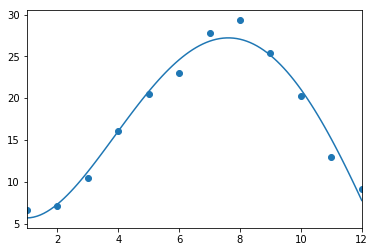

In [44]:
fig = plt.figure()
subplot = fig.add_subplot(1,1,1)
subplot.set_xlim(1,12)
subplot.scatter(range(1,13), train_t)
linex = np.linspace(1,12,100)
liney = temparature(linex)
subplot.plot(linex, liney)

In [146]:
temparature(3)

<tf.Tensor 'add_15:0' shape=(?, 5) dtype=float32>